In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
import time

In [2]:
df=pd.read_csv("D:/Machine Learning/thuc hanh/datasets/customer_churn_dataset-testing-master.csv/customer_churn(1).csv")

In [3]:
# Chọn các cột quan trọng để chia tập dữ liệu
selected_features = ["Payment Delay", "Support Calls", "Tenure", "Usage Frequency"]

# Tạo tập dữ liệu chỉ chứa các cột quan trọng và cột target (chẳng hạn là 'Churn')
data_subset = df[selected_features + ['Churn']]

# Chia thành features (X) và target (y)
features = data_subset.drop('Churn', axis=1)
target= data_subset['Churn']



In [4]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Chọn các cột quan trọng để chia tập dữ liệu
selected_features = ["Payment Delay", "Support Calls", "Tenure", "Usage Frequency"]

# Tạo tập dữ liệu chỉ chứa các cột quan trọng và cột target (chẳng hạn là 'Churn')
data_subset = df[selected_features + ['Churn']]

# Chia thành features (X) và target (y)
X = data_subset.drop('Churn', axis=1)
y = data_subset['Churn']

# Chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# In thông tin về kích thước của tập huấn luyện và tập kiểm tra
print("Kích thước tập huấn luyện:", X_train.shape, y_train.shape)
print("Kích thước tập kiểm tra:", X_test.shape, y_test.shape)


# X=df[['Glucose']]
# y=df[['Outcome']]
# # Chia thành tập huấn luyện và tập kiểm tra về năm kinh nghiệm và lương
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Sử dụng LazyPredict để tạo mô hình
clf = LazyClassifier()
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
# In ra các mô hình và điểm số đánh giá
print(models)

Kích thước tập huấn luyện: (51499, 4) (51499,)
Kích thước tập kiểm tra: (12875, 4) (12875,)


100%|██████████| 29/29 [04:12<00:00,  8.72s/it]

[LightGBM] [Info] Number of positive: 24411, number of negative: 27088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 51499, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474009 -> initscore=-0.104057
[LightGBM] [Info] Start training from score -0.104057
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.87               0.87     0.87      0.87   
RandomForestClassifier             0.86               0.86     0.86      0.86   
XGBClassifier                      0.86               0.86     0.86      0.86   
ExtraTreesClassifier               0.86

lấy mâũ ngẫu nhiên

In [21]:
# Chia thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

SVM model


Confusion Matrix
 [[5453 1340]
 [ 541 5541]]
accurary score: 0.85
recall score: 0.91
precision score: 0.81
f1 score: 0.85
SVM Elapsed Time: 31.51 (s)


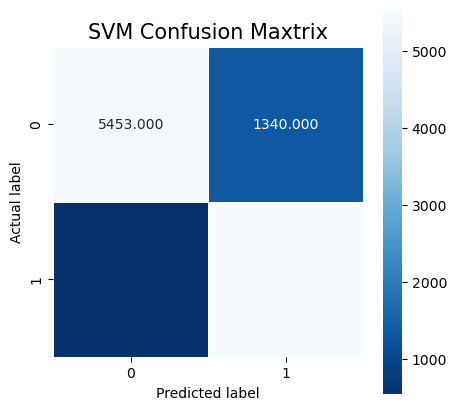

In [23]:
start_time = time.time()
classifierSVM=SVC(kernel='rbf',random_state=10)
classifierSVM.fit(X_train,y_train)
y_pred_test=classifierSVM.predict(X_test)
end_time = time.time()
elapsed_time_svm = end_time - start_time
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred_test))
print(f"accurary score: {accuracy_score(y_test,y_pred_test):.2f}")
print(f'recall score: {recall_score(y_test, y_pred_test):.2f}')
print(f'precision score: {precision_score(y_test, y_pred_test):.2f}')
print(f'f1 score: {f1_score(y_test, y_pred_test):.2f}')
print(f"SVM Elapsed Time: {(elapsed_time_svm):.2f} (s)")

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 5))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('SVM Confusion Maxtrix', size=15)
plt.show()

C:\Users\Asus-FPT\AppData\Local\Temp\ipykernel_1544\3800175752.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_svm_50['predicted_output'] = y_pred_test_svm_50
c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


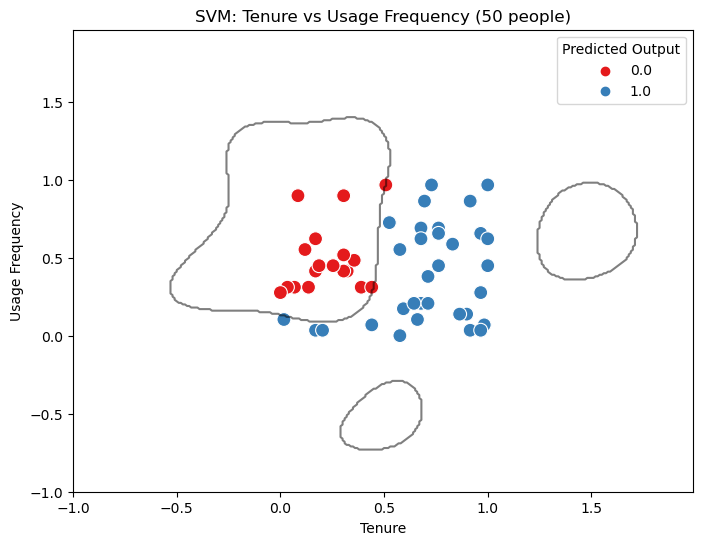

In [17]:
import random
random.seed(45)  # Để đảm bảo sự tái tạo
selected_samples = random.sample(range(len(X_test_svm)), 50)
X_test_svm_50 = X_test_svm.iloc[selected_samples]

# Dự đoán và Thêm Cột 'predicted_output' vào X_test_svm_50
y_pred_test_svm_50 = classifierSVM.predict(X_test_svm_50[['Tenure', 'Usage Frequency']])
X_test_svm_50['predicted_output'] = y_pred_test_svm_50

# Tạo Ma Trận Dự Đoán Cho Toàn Bộ Không Gian 2D
h = 0.01
x_min, x_max = X_test_svm_50['Tenure'].min() - 1, X_test_svm_50['Tenure'].max() + 1
y_min, y_max = X_test_svm_50['Usage Frequency'].min() - 1, X_test_svm_50['Usage Frequency'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = classifierSVM.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)



KNN Model

Confusion Matrix
 [[5746 1047]
 [ 875 5207]]
accurary score: 0.85
recall score: 0.86
precision score: 0.83
f1 score: 0.84
KNN Elapsed Time: 0.29 (s)


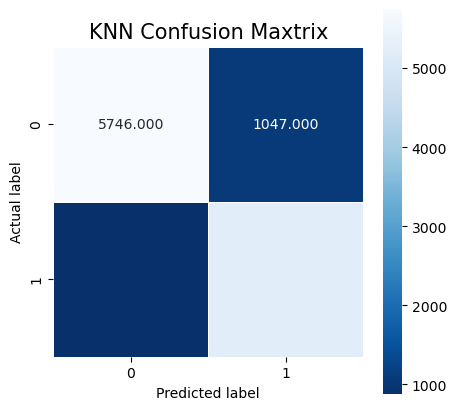

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tạo mô hình KNN với k=3 (số lượng láng giềng cận kề)
knn_model = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_test = knn_model.predict(X_test)
end_time = time.time()
elapsed_time_KNN = end_time - start_time

# Đánh giá mô hình trên tập kiểm tra
accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# In kết quả
# y_pred_test=knn_model.predict(X_test)
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred_test))
print(f"accurary score: {accuracy_score(y_test,y_pred_test):.2f}")
print(f'recall score: {recall_score(y_test, y_pred_test):.2f}')
print(f'precision score: {precision_score(y_test, y_pred_test):.2f}')
print(f'f1 score: {f1_score(y_test, y_pred_test):.2f}')
print(f"KNN Elapsed Time: {(elapsed_time_KNN):.2f} (s)")

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 5))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('KNN Confusion Maxtrix', size=15)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Tạo pipeline với mô hình SVM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC())
])

# Thiết lập lưới tham số để tìm kiếm
param_grid = {
    'svm__C': [0.1, 1, 10, 10],  # Giá trị tham số C
    'svm__kernel': ['linear', 'rbf']  # Loại kernel
}

# Sử dụng GridSearchCV để tìm kiếm tham số tốt nhất
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# Dự đoán trên tập kiểm tra và đánh giá hiệu suất
y_pred_test = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set:", accuracy)


KNN Model

Confusion Matrix
 [[5746 1047]
 [ 875 5207]]
accurary score: 0.85
recall score: 0.86
precision score: 0.83
f1 score: 0.84
KNN Elapsed Time: 0.29 (s)


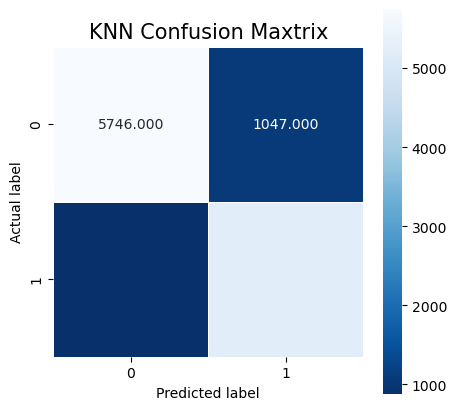

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tạo mô hình KNN với k=3 (số lượng láng giềng cận kề)
knn_model = KNeighborsClassifier(n_neighbors=3)
start_time = time.time()
# Huấn luyện mô hình trên tập huấn luyện
knn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_test = knn_model.predict(X_test)
end_time = time.time()
elapsed_time_KNN = end_time - start_time

# Đánh giá mô hình trên tập kiểm tra
accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
classification_rep = classification_report(y_test, y_pred_test)

# In kết quả
# y_pred_test=knn_model.predict(X_test)
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred_test))
print(f"accurary score: {accuracy_score(y_test,y_pred_test):.2f}")
print(f'recall score: {recall_score(y_test, y_pred_test):.2f}')
print(f'precision score: {precision_score(y_test, y_pred_test):.2f}')
print(f'f1 score: {f1_score(y_test, y_pred_test):.2f}')
print(f"KNN Elapsed Time: {(elapsed_time_KNN):.2f} (s)")

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 5))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('KNN Confusion Maxtrix', size=15)
plt.show()



Logistic model

Confusion Matrix
 [[5524 1269]
 [1118 4964]]
accurary score: 0.81
recall score: 0.82
precision score: 0.80
f1 score: 0.81


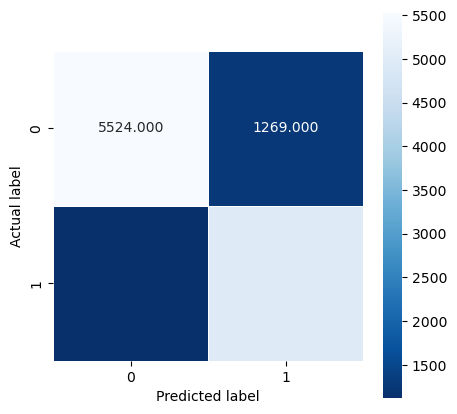

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tạo mô hình hồi quy logistic
logistic_model = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện
logistic_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_test1 = logistic_model.predict(X_test)

# Đánh giá mô hình trên tập kiểm tra
accuracy = accuracy_score(y_test, y_pred_test1)
conf_matrix = confusion_matrix(y_test, y_pred_test1)

# In kết quả
y_pred_test=logistic_model.predict(X_test)
print("Confusion Matrix\n",confusion_matrix(y_test, y_pred_test))
print(f"accurary score: {accuracy_score(y_test,y_pred_test):.2f}")
print(f'recall score: {recall_score(y_test, y_pred_test):.2f}')
print(f'precision score: {precision_score(y_test, y_pred_test):.2f}')
print(f'f1 score: {f1_score(y_test, y_pred_test):.2f}')

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 5))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

c:\Users\Asus-FPT\anaconda3\envs\ML01\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Figure size 2500x800 with 0 Axes>

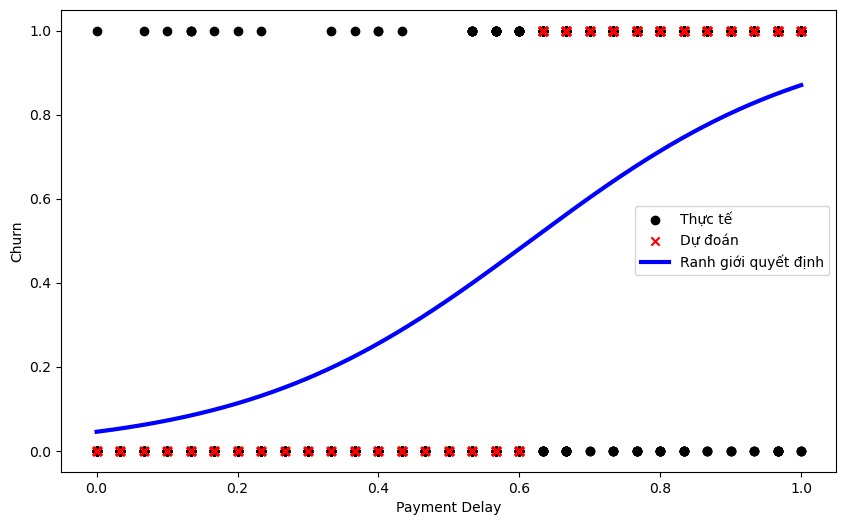

In [58]:
from sklearn.linear_model import LogisticRegression

selected_feature = "Payment Delay"

# Tạo tập dữ liệu chỉ chứa đặc trưng và nhãn
data_subset = df[[selected_feature, 'Churn']]
X = data_subset[[selected_feature]]
y = data_subset['Churn']

# Chia thành features (X) và target (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo và huấn luyện mô hình hồi quy logistic trên tập huấn luyện
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_test = logistic_model.predict(X_test)

# Lấy mẫu 50 người
X_test_subset = X_test[:500]
y_test_subset = y_test[:500]
y_pred_test_subset = y_pred_test[:500]

plt.figure(figsize=(25, 8))
# Vẽ dữ liệu và ranh giới quyết định
plt.figure(figsize=(10, 6))
plt.scatter(X_test_subset, y_test_subset, color='black', label='Thực tế')
plt.scatter(X_test_subset, y_pred_test_subset, color='red', marker='x', label='Dự đoán')
plt.xlabel(selected_feature)
plt.ylabel('Churn')

# Vẽ ranh giới quyết định
x_values = np.linspace(X_test_subset.min(), X_test_subset.max(), 1000).reshape(-1, 1)
y_values = logistic_model.predict_proba(x_values)[:, 1]
plt.plot(x_values, y_values, color='blue', linewidth=3, label='Ranh giới quyết định')

plt.legend()
plt.show()


LGBMClassifier

In [74]:
# Tạo mô hình LGBMClassifier
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier()
start_time=time.time()
# Huấn luyện mô hình trên tập huấn luyện
lgbm_model.fit(X_train, y_train)
y_pred_test=lgbm_model.predict(X_test)
end_time=time.time()
elapsed_time_LGBM=end_time-start_time


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 24411, number of negative: 27088
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 132
[LightGBM] [Info] Number of data points in the train set: 51499, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.474009 -> initscore=-0.104057
[LightGBM] [Info] Start training from score -0.104057


Confusion Matrix
 [[5406 1387]
 [ 342 5740]]
accurary score: 0.87
recall score: 0.94
precision score: 0.81
f1 score: 0.87
LGBM Elapsed Time: 0.08 (s)


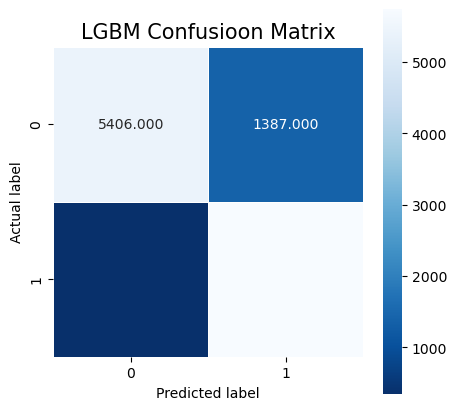

In [76]:

print("Confusion Matrix\n",confusion_matrix(y_test, y_pred_test))
print(f"accurary score: {accuracy_score(y_test,y_pred_test):.2f}")
print(f'recall score: {recall_score(y_test, y_pred_test):.2f}')
print(f'precision score: {precision_score(y_test, y_pred_test):.2f}')
print(f'f1 score: {f1_score(y_test, y_pred_test):.2f}')
print(f"LGBM Elapsed Time: {(elapsed_time_LGBM):.2f} (s)")

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5, 5))
sns.heatmap(cnf_matrix, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
# all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title('LGBM Confusioon Matrix', size=15)
plt.show()